### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [4]:
df=pd.read_csv(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\Machine_Learning\2-No_Supervisado\3-Clustering\Practica\data\drugLibTrain_raw.tsv", sep="\t")
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3107 non-null   object
 7   sideEffectsReview  3105 non-null   object
 8   commentsReview     3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [12]:
df=df.drop(["commentsReview"],axis=1)


KeyError: "['commentsReview'] not found in axis"

In [15]:
df.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview'],
      dtype='object')

In [16]:
df=df.drop(['benefitsReview', 'sideEffectsReview'],axis=1)

In [17]:

# Obtener las columnas con tipo de dato "object" en el DataFrame
columnas_object = df.select_dtypes(include='object').columns

# Aplicar pd.get_dummies() a las variables object y concatenar los resultados al DataFrame original
df_dummies = pd.get_dummies(df, columns=columnas_object)

# Mostrar el DataFrame resultante con las variables dummy
print(df_dummies.head())


   Unnamed: 0  rating  urlDrugName_abilify  urlDrugName_accolate  \
0        2202       4                    0                     0   
1        3117       1                    0                     0   
2        1146      10                    0                     0   
3        3947       3                    0                     0   
4        1951       2                    0                     0   

   urlDrugName_accupril  urlDrugName_accutane  urlDrugName_aciphex  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   urlDrugName_actiq  urlDrugName_actonel  urlDrugName_actos  ...  \
0                  0                    0                  0  ...   
1                  0            

In [18]:
df_dummies

,Unnamed: 0,rating,urlDrugName_abilify,urlDrugName_accolate,urlDrugName_accupril,urlDrugName_accutane,urlDrugName_aciphex,urlDrugName_actiq,urlDrugName_actonel,urlDrugName_actos,...,condition_white spots on facial skin,condition_whiteheads,condition_wilson diseaes,condition_wrinkles,condition_wrinkles around eyes,"condition_wrinkles, furrows",condition_year round allergies,condition_yeast,condition_yeast diaper rash,condition_yeast infection
0,2202,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3117,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1146,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3947,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1951,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,1039,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3103,3281,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3104,1664,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3105,2621,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [8]:
my_dict = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Mayor silhouette scores con K=2

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Iterar sobre diferentes valores de K
k_values = range(2, 11)  # Puedes ajustar el rango de valores de K según tus necesidades
best_score = -1
best_k = None

for k in k_values:
    # Crear una instancia de KMeans con el valor de K actual
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Ajustar el modelo a los datos
    kmeans.fit(df_dummies)

    # Calcular el silhouette score
    score = silhouette_score(df_dummies, kmeans.labels_)

    # Actualizar el mejor score y el mejor valor de K
    if score > best_score:
        best_score = score
        best_k = k

# Imprimir el mejor score y el mejor valor de K
print("Mejor silhouette score:", best_score)
print("Mejor valor de K:", best_k)


Mejor silhouette score: 0.6212909371824464
Mejor valor de K: 2


Con el Elbow method comprobamos que k=2 sería la opción más adecuada

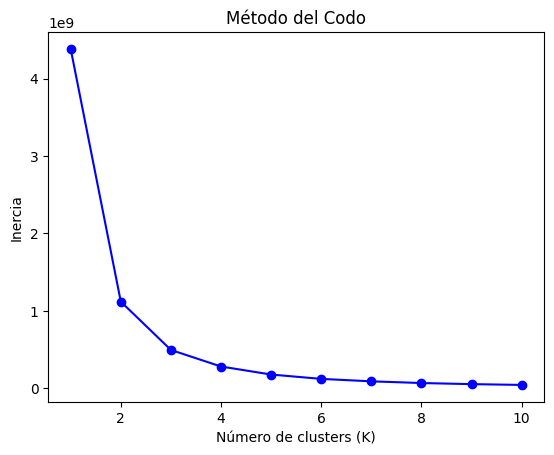

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar los valores de la inercia
inertia = []

# Iterar sobre diferentes valores de K
k_values = range(1, 11)  # Puedes ajustar el rango de valores de K según tus necesidades

for k in k_values:
    # Crear una instancia de KMeans con el valor de K actual
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Ajustar el modelo a los datos
    kmeans.fit(df_dummies)

    # Obtener la inercia y añadirla a la lista
    inertia.append(kmeans.inertia_)

# Graficar la curva de la inercia en función de K
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


#### Muestra en un gráfico de tartas la distribución de los distintos clusters

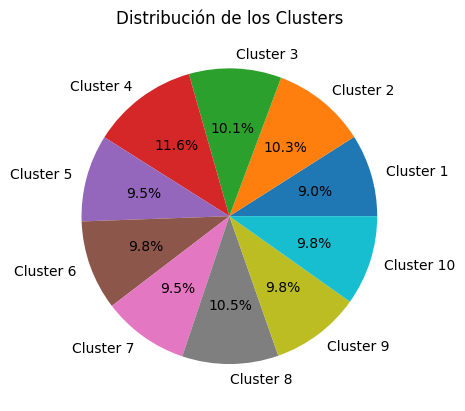

In [27]:
import matplotlib.pyplot as plt

# Obtener las etiquetas de los clusters asignados a cada observación
labels = kmeans.labels_

# Contar la cantidad de observaciones en cada cluster
cluster_counts = []
for i in range(k):
    count = len(labels[labels == i])
    cluster_counts.append(count)

# Crear una lista de etiquetas para los clusters
cluster_labels = ['Cluster {}'.format(i+1) for i in range(k)]

# Crear el gráfico de tartas
plt.pie(cluster_counts, labels=cluster_labels, autopct='%1.1f%%')
plt.title('Distribución de los Clusters')
plt.show()


In [28]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

NameError: name 'df_clusters' is not defined